In [64]:
import pyforest

In [65]:
milk = pd.read_csv('monthly_milk_production.csv')

<IPython.core.display.Javascript object>

In [66]:
milk.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [67]:
milk.isnull().sum()

Date          0
Production    0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

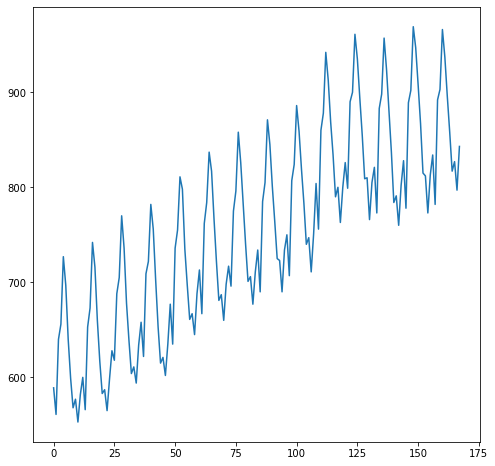

In [68]:
plt.figure(figsize = (8,8))
plt.plot(milk.Production)

In [69]:
milk.Date = pd.to_datetime(milk.Date,  infer_datetime_format = True)

<IPython.core.display.Javascript object>

In [70]:
milk

,Date,Production
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727
...,...,...
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797


<IPython.core.display.Javascript object>

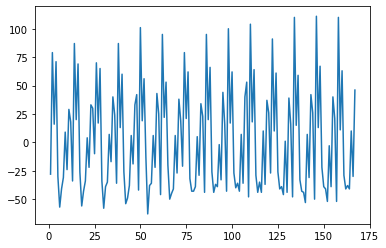

In [71]:
plt.plot(milk.Production.diff()) # after differencing This is stationary beacause Variance Changes is Constant and mean is also constant.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

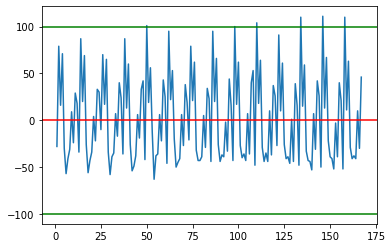

In [72]:
plt.plot(milk.Production.diff()) # Now it is almost Stationary
plt.axhline(y = 100, color = 'g')
plt.axhline(y = 0, color = 'red')
plt.axhline(y = -100, color = 'g')

In [73]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# milk_seasonl = seasonal_decompose(milk['Production'])
# milk_seasonl.plot(); # it is just to verify weather seasonal pattern is there or not

In [74]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

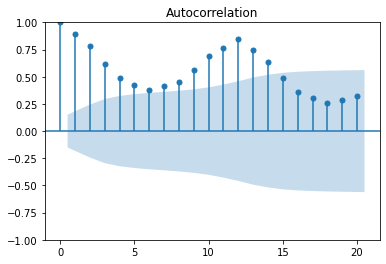

In [75]:
plot_acf(milk.Production, lags= 20); # No Information because slow decrease.

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


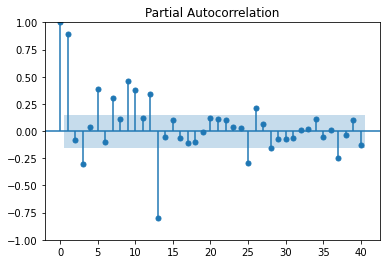

In [76]:
plot_pacf(milk.Production, lags=40); 

In [77]:
train = milk.iloc[0:148]
test = milk.iloc[148:]

In [78]:
import pmdarima
from pmdarima import auto_arima
auto_arima(milk['Production'], seasonal = True, m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
model = SARIMAX(train['Production'], order=(2,2,0),seasonal_order=(0, 1, 1, 12))
result = model.fit();

In [89]:
pred_rv = result.predict(start = 148 , end = 169)

In [90]:
pred_rv

148    962.297008
149    937.019112
150    893.136471
151    854.029822
152    808.547281
153    814.245114
154    780.521468
155    821.663635
156    847.758566
157    804.393524
158    910.366194
159    925.597128
160    987.335113
161    960.651609
162    918.299568
163    879.487708
164    833.969008
165    840.532204
166    807.028571
167    848.527287
168    875.172486
169    832.117363
Name: predicted_mean, dtype: float64

In [91]:
error = test.Production - pred_rv
error

148     6.702992
149     9.980888
150    14.863529
151    12.970178
152     6.452719
153    -2.245114
154    -7.521468
155    -8.663635
156   -13.758566
157   -22.393524
158   -18.366194
159   -22.597128
160   -21.335113
161   -23.651609
162   -22.299568
163   -21.487708
164   -16.969008
165   -13.532204
166   -10.028571
167    -5.527287
168          NaN
169          NaN
dtype: float64

In [92]:
MSE = np.mean(np.square(error))
MSE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

241.32458394585925